In [ ]:
from pyide import *
from scipy.stats import norm

import matplotlib.pyplot as plt
import matplotlib

No handles with labels found to put in legend.


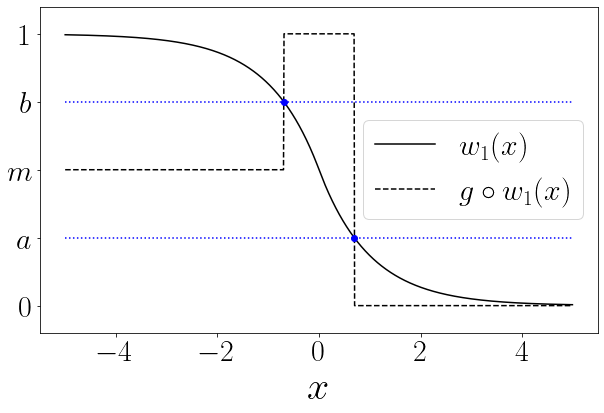

In [95]:
# make plots of w1 and w2 for demonstration purposes


from pyide import *
from scipy.stats import norm

import matplotlib.pyplot as plt
import matplotlib

SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

matplotlib.rcParams['text.usetex'] = True



alpha=0.25
beta = 0.75
mu = 0.5

H = lambda x : np.heaviside(x, 1)
g = lambda u : H(u-alpha) - (1-mu) * H(u-beta)


K = lambda x : H(x) + 1/2 * (1-2*H(x)) * np.exp((2*H(x)-1)*(-x))

w1 = lambda x : K(-x)
dx = 0.01
X = np.arange(-5, 5, dx)

K_inv = lambda p : np.log(2*p)*H(1/2-p) - np.log(2-2*p)*H(p-1/2)

import matplotlib.pyplot as plt

fig =plt.figure(figsize=(10,6))
ax =fig.add_subplot(111)

plt.plot([min(X),max(X)],[alpha,alpha], color='blue', linestyle='dotted')
plt.plot([min(X),max(X)],[beta,beta], color='blue', linestyle='dotted')

plt.legend()



Phia = -K_inv(alpha)
Phib = -K_inv(beta)
#plt.plot([Phia,Phia],[0,alpha], color='blue', linestyle='dotted')
#plt.plot([Phib,Phib],[0,beta], color='blue', linestyle='dotted')

#ax.set_xticks([Phib,Phia])
#ax.set_xticks([])
ax.set_yticks([0,alpha,mu,beta,1])
#ax.set_xticklabels(['$\Phi_1(b)$','$\Phi_1(a)$'])
ax.set_yticklabels(['$0$','$a$','$m$','$b$','$1$'])

#ax.annotate('$(a,\Phi_1(a))$', xy=(alpha,Phia))
#ax.annotate('$(b,\Phi_1(b))$', xy=(beta,Phib))

ax.set_xlabel('$x$')
#ax.set_ylabel('$u$', labelpad=20,rotation=0)

plt.plot(X, w1(X), label='$w_1(x)$', color='black')

plt.plot(X, g(w1(X)), label='$g\circ w_1(x)$', color='black', linestyle='dashed')

plt.plot(Phia, alpha,'o', color='blue')
plt.plot(Phib, beta,'o', color='blue')
plt.ylim(-0.1, 1.1)
plt.legend()

plt.savefig('fig7a.pdf',bbox_inches='tight')

No handles with labels found to put in legend.


0.6931471805599453 -0.6931471805599453


<Figure size 432x288 with 0 Axes>

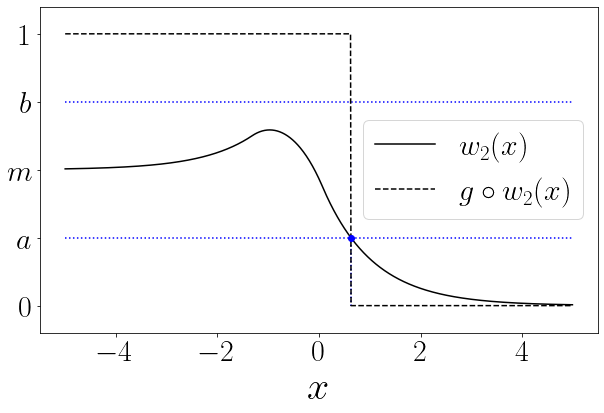

In [96]:


# Find x_alpha and x_beta


x_alpha = K_inv(1-alpha)
x_beta =  K_inv(1-beta)
print(x_alpha,x_beta)
QW1 = lambda x : 1 - K(x-x_alpha) - (1-mu) * (1-K(x-x_beta))

c = min(X) + dx*max([i for i in range(len(X)) if QW1(X[i])>alpha])
c = c / 2

w2 = lambda x : QW1(x+c)


plt.clf()

fig =plt.figure(figsize=(10,6))
ax =fig.add_subplot(111)

plt.plot([min(X),max(X)],[alpha,alpha], color='blue', linestyle='dotted')
plt.plot([min(X),max(X)],[beta,beta], color='blue', linestyle='dotted')
plt.plot([c,c],[0,alpha], color='blue', linestyle='dotted')

plt.legend()

#ax.set_xticks([c])
#ax.set_xticks([])
ax.set_yticks([0,alpha,mu,beta,1])
ax.set_yticklabels(['$0$','$a$','$m$','$b$','$1$'])
#ax.set_xticklabels(['$c^*$'])

ax.set_xlabel('$x$')
#ax.set_ylabel('$u$', labelpad=20, rotation=0)

plt.plot(X, w2(X), label='$w_2(x)$', color='black')
plt.plot(X, g(w2(X)), label='$g\circ w_2(x)$', color='black', linestyle='dashed')

plt.plot(c, alpha,'o', color='blue')
plt.ylim(-0.1, 1.1)
plt.legend()

plt.savefig('fig7b.pdf',bbox_inches='tight')